In [1]:
from typing import Tuple
from datetime import datetime
import pickle
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from typing import Tuple
from datetime import datetime
import pickle
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [3]:
def load_proton_a_images(data_dir, n=None):
    data_a = pd.read_pickle(os.path.join(data_dir, "proton_images2a.pkl"))
    data_b = pd.read_pickle(os.path.join(data_dir, "proton_images2b.pkl"))
    data_c = pd.read_pickle(os.path.join(data_dir, "proton_images2c.pkl"))
    return np.r_[data_a, data_b, data_c][:n]

def load_neutron_a_images(data_dir, n=None):
    data_a = pd.read_pickle(os.path.join(data_dir, "neutron_images2a.pkl"))
    data_b = pd.read_pickle(os.path.join(data_dir, "neutron_images2b.pkl"))
    data_c = pd.read_pickle(os.path.join(data_dir, "neutron_images2c.pkl"))
    return np.r_[data_a, data_b, data_c][:n]

def load_particle_data_a(data_dir, n=None):
    data_a = pd.read_pickle(os.path.join(data_dir, "particles_cond_with_mass2a.pkl"))
    data_b = pd.read_pickle(os.path.join(data_dir, "particles_cond_with_mass2b.pkl"))
    data_c = pd.read_pickle(os.path.join(data_dir, "particles_cond_with_mass2c.pkl"))
    return pd.concat([data_a, data_b, data_c], axis=0)[:n]

In [4]:
DATA_DIR = "../data/"
N_SAMPLES_T0_LOAD = None  # If None, load all data

In [42]:
data_p = load_proton_a_images(DATA_DIR, N_SAMPLES_T0_LOAD)
print('Loaded Proton: ',  data_p.shape)

Loaded Proton:  (511810, 56, 30)


In [8]:
data_n = load_neutron_a_images(DATA_DIR, N_SAMPLES_T0_LOAD)
print('Loaded Neutron: ',  data_n.shape)

Loaded Neutron:  (511810, 44, 44)


In [9]:
data_cond = load_particle_data_a(DATA_DIR, N_SAMPLES_T0_LOAD)
print('Loaded cond: ',  data_cond.shape)

Loaded cond:  (511810, 11)


In [7]:
data_cond

,Pdg,Energy,Vx,Vy,Vz,Px,Py,Pz,PhotonSum,mass,charge
0,22,513.318,1.454300e-08,3.650510e-08,-0.002731,0.035456,-0.051821,-513.318,291,0.000000,0.0
1,22,1304.340,-1.831820e-05,1.555780e-05,0.050293,-0.509192,0.461106,1304.340,8,0.000000,0.0
2,22,1014.720,-1.831820e-05,1.555780e-05,0.050293,-0.335473,0.256277,1014.720,130,0.000000,0.0
3,-211,325.158,0.000000e+00,0.000000e+00,0.000000,0.269915,-0.081921,325.157,0,139.570610,-1.0
4,2112,3192.380,0.000000e+00,0.000000e+00,0.000000,0.022422,-0.182957,-3192.380,1256,939.565413,0.0
...,...,...,...,...,...,...,...,...,...,...,...
203352,3122,4071.230,0.000000e+00,0.000000e+00,0.000000,0.089305,0.069410,-4071.230,34,1115.683000,0.0
203353,3122,4003.600,0.000000e+00,0.000000e+00,0.000000,0.769178,-0.276743,4003.600,1419,1115.683000,0.0
203354,22,892.561,3.026130e-05,-2.853110e-06,0.114929,0.286136,0.021616,892.561,97,0.000000,0.0
203355,22,1037.070,3.026130e-05,-2.853110e-06,0.114929,0.221947,-0.069519,1037.070,600,0.000000,0.0


# Handle Sum Photons

## Calculate Sum Photons

In [45]:
data_cond.rename(columns={"PhotonSum": "neutron_photon_sum"}, inplace=True)
data_cond.neutron_photon_sum = data_cond.neutron_photon_sum.astype(float)

In [46]:
data_cond['proton_photon_sum'] = np.sum(data_p, axis=(1,2))
data_cond.head()

,Pdg,Energy,Vx,Vy,Vz,Px,Py,Pz,neutron_photon_sum,mass,charge,proton_photon_sum
0,22,513.318,1.454300e-08,3.650510e-08,-0.002731,0.035456,-0.051821,-513.318,291.0,0.000000,0.0,0.0
1,22,1304.340,-1.831820e-05,1.555780e-05,0.050293,-0.509192,0.461106,1304.340,8.0,0.000000,0.0,9.0
2,22,1014.720,-1.831820e-05,1.555780e-05,0.050293,-0.335473,0.256277,1014.720,130.0,0.000000,0.0,0.0
3,-211,325.158,0.000000e+00,0.000000e+00,0.000000,0.269915,-0.081921,325.157,0.0,139.570610,-1.0,5.0
4,2112,3192.380,0.000000e+00,0.000000e+00,0.000000,0.022422,-0.182957,-3192.380,1256.0,939.565413,0.0,16.0


## Photon Sum Distribution

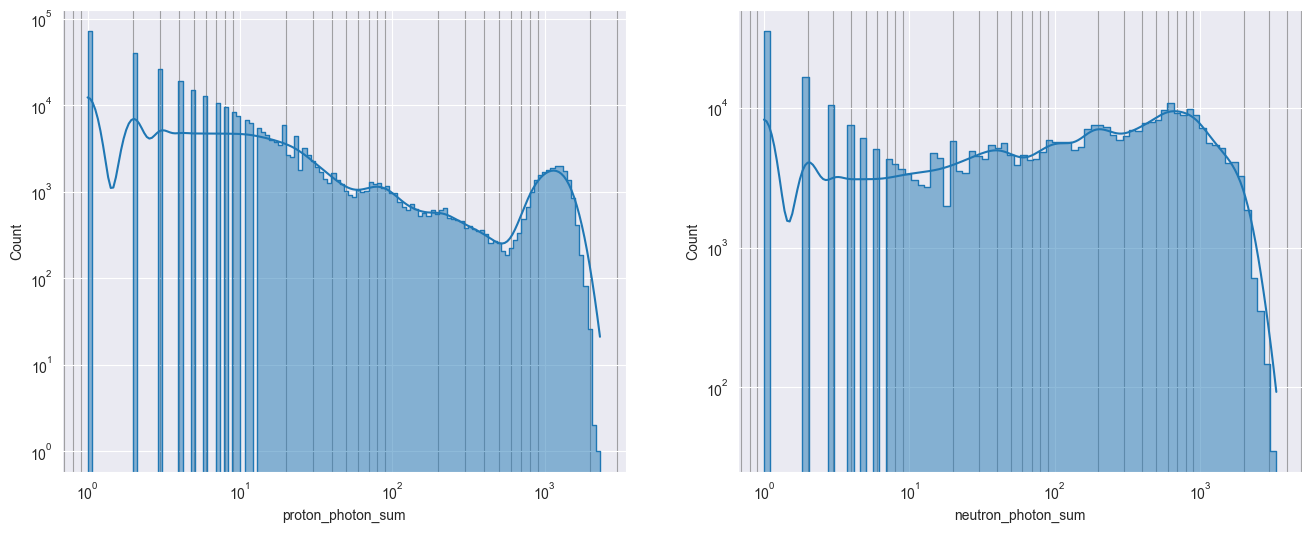

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(16, 6))

sns.histplot(data_cond[data_cond.proton_photon_sum!=0].proton_photon_sum, kde=True, ax=ax1, log_scale=(True, True), element="step")
sns.histplot(data_cond[data_cond.neutron_photon_sum!=0].neutron_photon_sum, kde=True, ax=ax2, log_scale=(True, True), element="step")
ax1.grid(which="minor", axis="x", alpha=0.7, color='grey', linestyle='-')
ax2.grid(which="minor", axis="x", alpha=0.7, color='grey', linestyle='-');

## Filter Photon Sum

In [47]:
def filter_photon_sum(data_p, data_n, data_conditional, proton_interval: Tuple, neutron_interval: Tuple):
    """
    Returns particle data and responses of experiments with minimum sum of photons.
    :param data_p: Responses of proton calorimeter, shape=(N, 50, 30)
    :param data_n: Responses of neutron calorimeter, shape=(N, 44, 44)
    :param data_conditional: Conditional data for particles
    :param proton_interval: Tuple containing interval of interests in photon sum of proton response
    :param neutron_interval: Tuple containing interval of interests in photon sum of neutron response
    :return:
    """
    (proton_min, proton_max), (neutron_min, neutron_max) = proton_interval, neutron_interval

    mask = ((data_conditional.proton_photon_sum >= proton_min)\
           & (data_conditional.proton_photon_sum <= proton_max)) \
           & \
           ((data_conditional.neutron_photon_sum >= neutron_min)\
           & (data_conditional.neutron_photon_sum <= neutron_max))
    return data_p[mask], data_n[mask], data_conditional[mask].reset_index(drop=True)

PROTON_PHOTON_SUM_INTERVAL = (20, data_cond.proton_photon_sum.max())
NEUTRON_PHOTON_SUM_INTERVAL = (20, data_cond.neutron_photon_sum.max())

data_p, data_n, data_cond = filter_photon_sum(data_p, data_n, data_cond,
                                              proton_interval=PROTON_PHOTON_SUM_INTERVAL, neutron_interval=NEUTRON_PHOTON_SUM_INTERVAL)

print("Proton data: shape:", data_p.shape,
      "\nNeutron data: shape:", data_n.shape,
      "\nCond data: shape:", data_cond.shape)

Proton data: shape: (32951, 56, 30) 
Neutron data: shape: (32951, 44, 44) 
Cond data: shape: (32951, 12)


## Save filtered data

In [38]:
def get_interval_str(interval1, interval2=None):
    """
    Example input: interval1 = (15, 1195), interval2 = (15, 1614)
    Example output: 15_1195_15_1614
    """
    if interval2:
        return "_".join([str(int(elem)) for elem in interval1]) + "_" + "_".join([str(int(elem)) for elem in interval2])
    return "_".join([str(int(elem)) for elem in interval1])

In [39]:
# save conditional data
data_cond.to_pickle(os.path.join(DATA_DIR,
                                 f"data_cond_photonsum_{get_interval_str(PROTON_PHOTON_SUM_INTERVAL, NEUTRON_PHOTON_SUM_INTERVAL)}.pkl"))

In [40]:
# save proton data
with open(os.path.join(DATA_DIR,
                       f"data_proton_photonsum_{get_interval_str(PROTON_PHOTON_SUM_INTERVAL)}.pkl"), 'wb') as f:
    pickle.dump(data_p, f)

In [27]:
# save neutron data
with open(os.path.join(DATA_DIR,
                       f"data_neutron_photonsum_{get_interval_str(NEUTRON_PHOTON_SUM_INTERVAL)}.pkl"), 'wb') as f:
    pickle.dump(data_n, f)

# Image padding

Two sizes of images:
- 56 x 30
- 44 x 44

__Goal:__ Add padding to images to transform them to common size: 56 x 44

__Approaches:__
- add padding around the images (center the content)
- add padding to one side of images

In [48]:
from enum import Enum

class PaddingMethod(Enum):
    CENTER = 0
    LEFT_SIDE = 0

In [49]:
def add_padding_56_30(image, method: PaddingMethod = PaddingMethod.CENTER.name):
    """
    Transform image of shape(56, 30) into shape(56, 44).
    :param method: Method of adding padding
    :param image: Image of shape(56, 30)
    :returns: Image of shape(56, 44)
    """
    if method == PaddingMethod.CENTER.name:
        # Add 7 pixels to the left and right side of image
        return np.pad(image,
                      pad_width=((0, 0), (7, 7)),
                      mode='constant', constant_values=0)


def add_padding_44_44(image, method: PaddingMethod = PaddingMethod.CENTER.name):
    """
    Transform image of shape(44, 44) into shape(56, 44).
    :param method: Method of adding padding
    :param image: Image of shape(44, 44)
    :returns: Image of shape(56, 44)
    """
    if method == PaddingMethod.CENTER.name:
        # Add 7 pixels to the top and bottom side of image
        return np.pad(image,
                      pad_width=((6, 6), (0, 0)),
                      mode='constant', constant_values=0)

In [50]:
padded_p = np.array(list(map(add_padding_56_30, data_p)))

In [51]:
padded_n = np.array(list(map(add_padding_44_44, data_n)))

In [52]:
padded_p.shape, padded_n.shape

((32951, 56, 44), (32951, 56, 44))

## Combine images into two channels

Given the padded images, combine them into a single image with 2 channels

In [53]:
def combine_into_channels(data_1, data_2):
    data = np.zeros(shape=(len(data_1), 56, 44, 2))
    data[:, :, :, 0] = data_1
    data[:, :, :, 1] = data_2
    return data

data = combine_into_channels(padded_p, padded_n)
data.shape

(32951, 56, 44, 2)

## Plot original and padded images

Text(0.5, 1.0, 'Original neutron image 44x44')

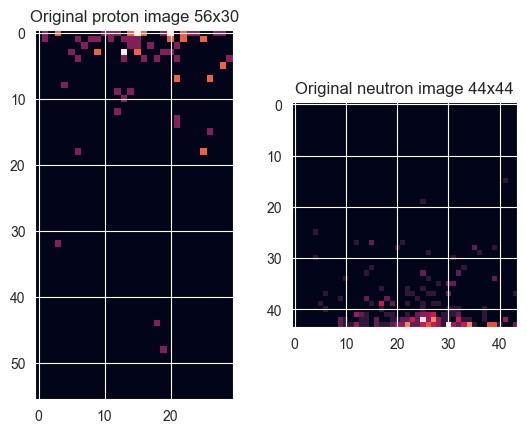

In [54]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data_p[2], interpolation='none'); ax[0].set_title("Original proton image 56x30")
ax[1].imshow(data_n[2], interpolation='none'); ax[1].set_title("Original neutron image 44x44")

Text(0.5, 1.0, 'Neutron image with padding 56x44')

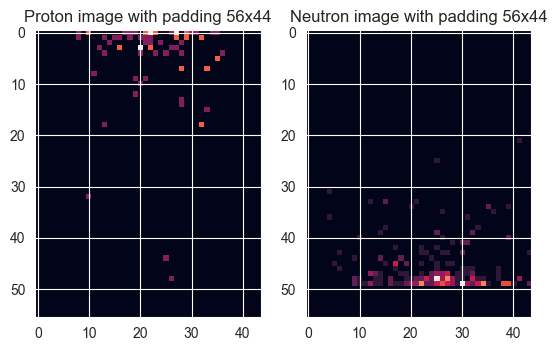

In [55]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(padded_p[2], interpolation='none'); ax[0].set_title("Proton image with padding 56x44")
ax[1].imshow(padded_n[2], interpolation='none'); ax[1].set_title("Neutron image with padding 56x44")

## Save files

In [56]:
# save conditional data
data_cond.to_pickle(os.path.join(DATA_DIR,
                                 f"data_cond_photonsum_{get_interval_str(PROTON_PHOTON_SUM_INTERVAL, NEUTRON_PHOTON_SUM_INTERVAL)}.pkl"))

### Combined data into 2 channels

In [59]:
# save proton and neutron data combined into 2 channels

proton_interval = get_interval_str(PROTON_PHOTON_SUM_INTERVAL)
neutron_interval = get_interval_str(NEUTRON_PHOTON_SUM_INTERVAL)

with open(os.path.join(DATA_DIR,
                       f"data_proton_{proton_interval}_neutron_{neutron_interval}_padded.pkl"), 'wb') as f:
    pickle.dump(data, f)

### Padded data

In [ ]:
# save proton padded data
with open(os.path.join(DATA_DIR,
                       f"data_proton_{get_interval_str(PROTON_PHOTON_SUM_INTERVAL)}_padded.pkl"), 'wb') as f:
    pickle.dump(padded_p, f)

In [ ]:
# save neutron padded data
with open(os.path.join(DATA_DIR,
                       f"data_neutron_{get_interval_str(NEUTRON_PHOTON_SUM_INTERVAL)}_padded.pkl"), 'wb') as f:
    pickle.dump(padded_n, f)